In [2]:
%pylab inline
import io3d
import skelet3d
from pathlib import Path
import copy
import glob
import time
import pandas as pd
# import sed

Populating the interactive namespace from numpy and matplotlib


C:\Users\Jirik\Miniconda3\envs\lisa3qt5\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
def vessel_skeleton_extraction(pth1):
    

    datap = io3d.read(pth1, datap=True)
    
    from skimage.filters import threshold_otsu
    threshold = threshold_otsu(datap["data3d"].ravel()[::1000])
    
    imthr = datap["data3d"] > threshold
#     imshow(imthr[int(imthr.shape[0]/2),:,:])
    volume_data = imthr
    skelet = skelet3d.skelet3d(volume_data)
    return skelet, volume_data, datap["voxelsize_mm"]

def skeleton_analysis(skelet, volume_data, voxelsize_mm):
    skan = skelet3d.SkeletonAnalyser(skelet, volume_data=volume_data, voxelsize_mm=voxelsize_mm)
    stats = skan.skeleton_analysis()

    df = stats_as_dataframe(skan)
    return df

def extract_df(df):
    dfs = df[["id", 
        "nodeA_ZYX 0", 
        "nodeA_ZYX 1", 
        "nodeA_ZYX 2", 
        "nodeB_ZYX 0",
        "nodeB_ZYX 1",
        "nodeB_ZYX 2",
        "nodeA_ZYX_mm 0", 
        "nodeA_ZYX_mm 1", 
        "nodeA_ZYX_mm 2", 
        "nodeB_ZYX_mm 0",
        "nodeB_ZYX_mm 1",
        "nodeB_ZYX_mm 2",
        "radius_mm",
        "connectedEdgesA 0",
        "connectedEdgesA 1",
        "connectedEdgesA 2",
        "connectedEdgesB 0",
        "connectedEdgesB 1",
        "connectedEdgesB 2",
       ]]
    dfs.to_csv(pth1 + ".csv")
    return dfs

In [4]:
def stats_as_dataframe(self):
        import pandas as pd
        import exsu.dili
        if self.stats is None:
            msg = "Run skeleton_analyser before stats_as_dataframe()"
            logger.error(msg)
            raise RuntimeError(msg)

        # import imtools.dili
        df = pd.DataFrame()
        for stats_key in self.stats:
            one_edge = copy.copy(self.stats[stats_key])
            k = "orderedPoints_mm_X"
            if k in one_edge:
                one_edge[k] = str(one_edge[k])
            k = "orderedPoints_mm_Y"
            if k in one_edge:
                one_edge[k] = str(one_edge[k])
            k = "orderedPoints_mm_Z"
            if k in one_edge:
                one_edge[k] = str(one_edge[k])
            k = "orderedPoints_mm"
            if k in one_edge:
                one_edge[k] = str(one_edge[k])
            # one_edge[]
            one_dct = exsu.dili.flatten_dict_join_keys(one_edge, simplify_iterables=True)
            # df_one = pd.DataFrame(one_dct)

            df_one = pd.DataFrame([list(one_dct.values())], columns=list(one_dct.keys()))
            df = df.append(df_one, ignore_index=True)
        return df

# Read the data

In [5]:
# pth = Path(io3d.datasets.join_path("medical/processed/porcine_liver_ct_raw", get_root=True))

pths = glob.glob("C:/Users/Jirik/Downloads/porcine_liver_ct_raw/*.mhd")
# pth1 = pth / "P01_MakroCT_HEAD_5_0_H31S_0004.mhd"
pth1 = pths[-1]
# pth1 = pths[2]
pths


['C:/Users/Jirik/Downloads/porcine_liver_ct_raw\\P01_a_MikroCT-nejhrubsi_rozliseni_DICOM_liver-1st-important_Macro_pixel-size53.0585um.mhd',
 'C:/Users/Jirik/Downloads/porcine_liver_ct_raw\\P01_b_Prase_1_druhe_vys.mhd',
 'C:/Users/Jirik/Downloads/porcine_liver_ct_raw\\P01_MakroCT_HEAD_5_0_H31S_0004.mhd',
 'C:/Users/Jirik/Downloads/porcine_liver_ct_raw\\P01_MakroCT_po_rozrezani_HEAD_0_6_H20S_0003.mhd']

In [6]:
# pth1 = pth / "P01_MakroCT_HEAD_5_0_H31S_0004.mhd"
# pth1 = "C:/Users/Jirik/Downloads/porcine_liver_ct_raw/P01_MakroCT_HEAD_5_0_H31S_0004.mhd"
# pth1 = r"C:/Users/Jirik/Downloads/porcine_liver_ct_raw/P01_a_MikroCT-nejhrubsi_rozliseni_DICOM_liver-1st-important_Macro_pixel-size53.0585um.mhd"
# pth1 = Path("g:\Můj disk\data\medical\processed\porcine_liver_ct_raw\P01_MakroCT_HEAD_5_0_H31S_0004.mhd")
print(pth1)
print(Path(pth1).exists())

t0 = time.time()
datap = io3d.read(pth1, datap=True)
print(time.time()-t0)

2020-06-17 08:19:57.347 | DEBUG    | io3d.datareader:Get3DData:146 - file read recognized
2020-06-17 08:19:57.351 | DEBUG    | io3d.datareader:__ReadFromFile:289 - file format "mhd"


C:/Users/Jirik/Downloads/porcine_liver_ct_raw\P01_MakroCT_po_rozrezani_HEAD_0_6_H20S_0003.mhd
True


2020-06-17 08:20:15.488 | DEBUG    | io3d.datareader:Get3DData:166 - dataplus format
2020-06-17 08:20:15.500 | DEBUG    | io3d.datareader:Get3DData:170 - datap keys () : dict_keys(['series_number', 'datadir', 'voxelsize_mm', 'data3d'])


18.158203601837158


In [7]:
import scipy.stats
data3d = datap["data3d"]

dsc = scipy.stats.describe(data3d.ravel()[::100])
# print(f"mn={np.min(datap['data3d'])}, mx={np.max(datap['data3d'])} ")
dsc

DescribeResult(nobs=2388132, minmax=(-1024, 2293), mean=-851.8223439910357, variance=88130.45453812866, skewness=2.2167865439262444, kurtosis=3.3398925782754816)

In [8]:
from skimage.filters import threshold_otsu, threshold_multiotsu
# classes = 5 if Path(pth1).name == 'P01_MakroCT_HEAD_5_0_H31S_0004.mhd'else 2
# thresholds = threshold_multiotsu(datap["data3d"].ravel()[::1000], classes=classes)
# threshold = thresholds[-1]
# classes
if Path(pth1).name in ('P01_MakroCT_HEAD_5_0_H31S_0004.mhd', 'P01_MakroCT_po_rozrezani_HEAD_0_6_H20S_0003.mhd'):
    
    threshold = 0
    data3d = data3d[:,:400,:] # cut the table
    
else:
    threshold = threshold_otsu(data3d.ravel()[::1000])

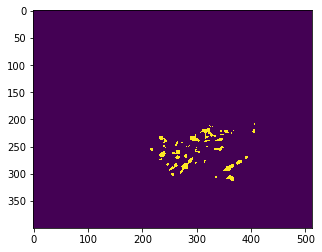

In [9]:

imthr = data3d > threshold
imshow(imthr[int(imthr.shape[0]/2),:,:])

# Do the skeleton analysis

In [10]:
volume_data = imthr
t0 = time.time()
skelet = skelet3d.skelet3d(volume_data)
print(time.time()-t0)

# skan = skelet3d.SkeletonAnalyser(skelet, volume_data=volume_data, voxelsize_mm=datap["voxelsize_mm"])
t0 = time.time()
skan = skelet3d.SkeletonAnalyser(
    skelet, 
#     volume_data=volume_data, 
    voxelsize_mm=datap["voxelsize_mm"]
)
print(time.time()-t0)
# skan.

256.76370429992676
21.79405379295349


In [11]:
skan.sklabel.dtype

dtype('int32')

In [12]:

# sklabel_nodes = skan.sklabel.copy()
# sklabel_nodes[sklabel_nodes > 0] = 0
nz = np.nonzero(skan.sklabel < 0)
nz

(array([ 68,  73,  79, ..., 783, 812, 812], dtype=int64),
 array([205, 203, 208, ..., 294, 288, 289], dtype=int64),
 array([154, 134, 404, ..., 237, 295, 291], dtype=int64))

In [13]:
voxelsize_mm = datap["voxelsize_mm"]

dfs = pd.DataFrame({
    "node_0_px":nz[0],
    "node_1_px":nz[1],
    "node_2_px":nz[2],
    "node_0_mm":nz[0]*voxelsize_mm[0],
    "node_1_mm":nz[1]*voxelsize_mm[1],
    "node_2_mm":nz[2]*voxelsize_mm[2],
})
dfs.to_csv(pth1 + ".nodes.csv")
# df["Z_px"]

In [14]:
# io3d.write({"data3d"})
np.savez(pth1 + ".npz", sklabel=skan.sklabel, imthr=imthr)

In [15]:

# dir(skan)#.__connection_analysis
# skan._SkeletonAnalyser__connection_analysis(3)

# Time consuming steps

In [ ]:
t0 = time.time()
stats = skan.skeleton_analysis()
print(time.time()-t0)

In [12]:



    
df = stats_as_dataframe(skan)

C:\Users\Jirik\Miniconda3\envs\lisa3qt5\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [32]:
df.keys()

Index(['connectedEdgesA 0', 'connectedEdgesA 1', 'connectedEdgesA 2',
       'connectedEdgesA 3', 'connectedEdgesB 0', 'connectedEdgesB 1',
       'connectedEdgesB 2', 'connectedEdgesB 3', 'curve_params fitCurveStrX',
       'curve_params fitCurveStrY', 'curve_params fitCurveStrZ',
       'curve_params fitParamsX 0', 'curve_params fitParamsX 1',
       'curve_params fitParamsX 2', 'curve_params fitParamsY 0',
       'curve_params fitParamsY 1', 'curve_params fitParamsY 2',
       'curve_params fitParamsZ 0', 'curve_params fitParamsZ 1',
       'curve_params fitParamsZ 2', 'curve_params start 0',
       'curve_params start 1', 'curve_params start 2', 'curve_params vector 0',
       'curve_params vector 1', 'curve_params vector 2', 'id',
       'lengthEstimation', 'lengthEstimationPixel', 'lengthEstimationPoly',
       'lengthEstimationSpline', 'nodeA_ZYX 0', 'nodeA_ZYX 1', 'nodeA_ZYX 2',
       'nodeA_ZYX_mm 0', 'nodeA_ZYX_mm 1', 'nodeA_ZYX_mm 2', 'nodeB_ZYX 0',
       'nodeB_ZYX 1', 'n

In [25]:
datap["voxelsize_mm"]

[5.0, 0.474609, 0.474609]

In [26]:
dfs = df[["id", 
    "nodeA_ZYX 0", 
    "nodeA_ZYX 1", 
    "nodeA_ZYX 2", 
    "nodeB_ZYX 0",
    "nodeB_ZYX 1",
    "nodeB_ZYX 2",
    "nodeA_ZYX_mm 0", 
    "nodeA_ZYX_mm 1", 
    "nodeA_ZYX_mm 2", 
    "nodeB_ZYX_mm 0",
    "nodeB_ZYX_mm 1",
    "nodeB_ZYX_mm 2",
    "radius_mm",
    "connectedEdgesA 0",
    "connectedEdgesA 1",
    "connectedEdgesA 2",
    "connectedEdgesB 0",
    "connectedEdgesB 1",
    "connectedEdgesB 2",
   ]]

dfs

,id,nodeA_ZYX 0,nodeA_ZYX 1,nodeA_ZYX 2,nodeB_ZYX 0,nodeB_ZYX 1,nodeB_ZYX 2,nodeA_ZYX_mm 0,nodeA_ZYX_mm 1,nodeA_ZYX_mm 2,nodeB_ZYX_mm 0,nodeB_ZYX_mm 1,nodeB_ZYX_mm 2,radius_mm,connectedEdgesA 0,connectedEdgesA 1,connectedEdgesA 2,connectedEdgesB 0,connectedEdgesB 1,connectedEdgesB 2
0,1,4.0,201.0,240.0,4.0,200.000000,237.000000,20.0,95.396409,113.906160,20.0,94.921800,112.482333,0.474609,NaN,NaN,NaN,NaN,NaN,NaN
1,2,9.0,190.0,285.0,5.0,192.000000,248.000000,45.0,90.175710,135.263565,25.0,91.124928,117.703032,0.704953,22.0,35.0,NaN,NaN,NaN,NaN
2,3,13.0,158.0,220.0,5.0,194.000000,225.000000,65.0,74.988222,104.413980,25.0,92.074146,106.787025,1.248332,54.0,71.0,NaN,NaN,NaN,NaN
3,4,11.0,181.0,223.0,6.0,191.000000,210.000000,55.0,85.904229,105.837807,30.0,90.650319,99.667890,1.038047,NaN,NaN,NaN,NaN,NaN,NaN
4,5,10.0,216.0,271.0,6.0,218.000000,276.000000,50.0,102.515544,128.619039,30.0,103.464762,130.992084,0.628508,28.0,39.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,35.0,210.0,297.0,35.0,206.000000,300.000000,175.0,99.667890,140.958873,175.0,97.769454,142.382700,0.523756,NaN,NaN,NaN,NaN,NaN,NaN
296,297,35.0,231.0,442.0,34.0,224.333333,426.333333,175.0,109.634679,209.777178,170.0,106.470619,202.341637,0.865931,NaN,NaN,NaN,284.0,298.0,NaN
297,298,38.0,239.0,426.0,34.0,224.333333,426.333333,190.0,113.431551,202.183434,170.0,106.470619,202.341637,0.962546,NaN,NaN,NaN,284.0,297.0,NaN
298,299,36.0,219.0,315.0,36.0,217.000000,317.000000,180.0,103.939371,149.501835,180.0,102.990153,150.451053,0.474609,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:


dfs.to_csv(pth1 + ".csv")

In [36]:
df[["id", "lengthEstimation", "radius_mm", "tortuosity", 'phiAc', "phiBa", "phiBb", 'connectedEdgesA 0', 'connectedEdgesA 1',
    'connectedEdgesB 0', 'connectedEdgesB 1',
    'connectedEdgesA 2',
       'connectedEdgesA 3',
       'connectedEdgesB 2', 'connectedEdgesB 3']]

,id,lengthEstimation,radius_mm,tortuosity,phiAc,phiBa,phiBb,connectedEdgesA 0,connectedEdgesA 1,connectedEdgesB 0,connectedEdgesB 1,connectedEdgesA 2,connectedEdgesA 3,connectedEdgesB 2,connectedEdgesB 3
0,1,1.663841,0.474609,1.108602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,30.438152,0.704953,1.142908,126.939192,NaN,NaN,22.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,44.651448,1.248332,1.025033,136.963649,NaN,NaN,54.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,27.878795,1.038047,1.064733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,21.597572,0.628508,1.071167,104.408087,NaN,NaN,28.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,2.575768,0.523756,1.085428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,297,12.521959,0.865931,1.317747,NaN,NaN,NaN,NaN,NaN,284.0,298.0,NaN,NaN,NaN,NaN
297,298,21.717960,0.962546,1.025528,NaN,NaN,NaN,NaN,NaN,284.0,297.0,NaN,NaN,NaN,NaN
298,299,1.342397,0.474609,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Bulk processing

In [8]:
import glob
pths = glob.glob("C:/Users/Jirik/Downloads/porcine_liver_ct_raw/*.mhd")
# pth1 = pth / "P01_MakroCT_HEAD_5_0_H31S_0004.mhd"
# pth1
pths


['C:/Users/Jirik/Downloads/porcine_liver_ct_raw\\P01_a_MikroCT-nejhrubsi_rozliseni_DICOM_liver-1st-important_Macro_pixel-size53.0585um.mhd',
 'C:/Users/Jirik/Downloads/porcine_liver_ct_raw\\P01_b_Prase_1_druhe_vys.mhd',
 'C:/Users/Jirik/Downloads/porcine_liver_ct_raw\\P01_MakroCT_HEAD_5_0_H31S_0004.mhd',
 'C:/Users/Jirik/Downloads/porcine_liver_ct_raw\\P01_MakroCT_po_rozrezani_HEAD_0_6_H20S_0003.mhd']

In [11]:
# for pth1 in pths:
#     vesse
outputs = vessel_skeleton_extraction(pths[0])
# df = keleton_analysis(*outputs)
# dfs = extract_df(df)

2020-06-10 11:46:31.323 | DEBUG    | io3d.datareader:Get3DData:146 - file read recognized
2020-06-10 11:46:31.324 | DEBUG    | io3d.datareader:__ReadFromFile:289 - file format "mhd"
2020-06-10 11:47:01.167 | DEBUG    | io3d.datareader:Get3DData:166 - dataplus format
2020-06-10 11:47:01.227 | DEBUG    | io3d.datareader:Get3DData:170 - datap keys () : dict_keys(['series_number', 'datadir', 'voxelsize_mm', 'data3d'])


In [12]:

outputs

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],